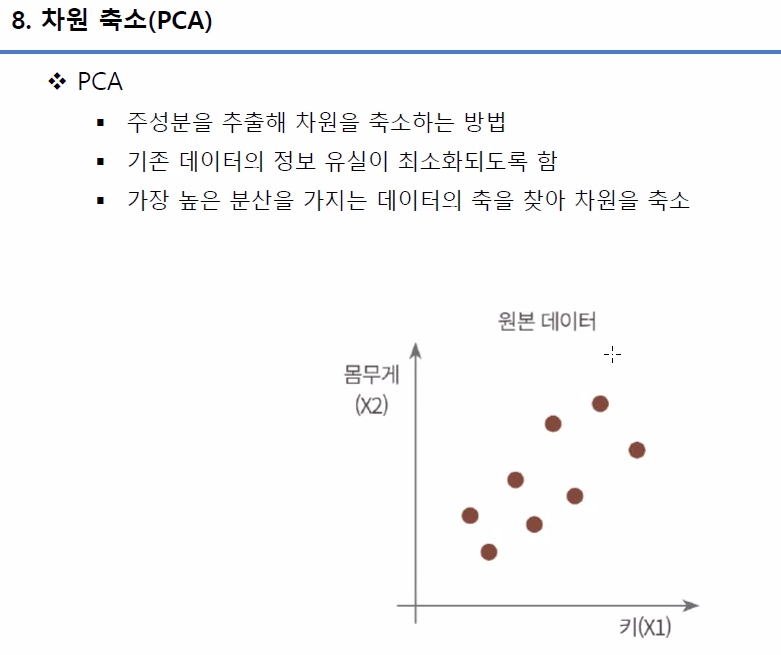

## PCA(Principal Component Analysis) - iris

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
from sklearn.datasets import load_iris
iris = load_iris()

In [ ]:
# pca를 쓰려면 표준화를 해야한다
from sklearn.preprocessing import StandardScaler
iris_std = StandardScaler().fit_transform(iris.data)

#### 1. numpy로 직접 구하기


In [ ]:
# 공분산 행렬
iris_cov = np.dot(iris_std.T, iris_std) / (len(iris_std) - 1)
iris_cov

array([[ 1.00671141, -0.11835884,  0.87760447,  0.82343066],
       [-0.11835884,  1.00671141, -0.43131554, -0.36858315],
       [ 0.87760447, -0.43131554,  1.00671141,  0.96932762],
       [ 0.82343066, -0.36858315,  0.96932762,  1.00671141]])

In [ ]:
np.cov(iris_std.T)

array([[ 1.00671141, -0.11835884,  0.87760447,  0.82343066],
       [-0.11835884,  1.00671141, -0.43131554, -0.36858315],
       [ 0.87760447, -0.43131554,  1.00671141,  0.96932762],
       [ 0.82343066, -0.36858315,  0.96932762,  1.00671141]])

In [ ]:
# 고유벡터, 고유값
eig_vals, eig_vecs = np.linalg.eig(iris_cov)
eig_vals

array([2.93808505, 0.9201649 , 0.14774182, 0.02085386])

In [ ]:
eig_vecs # 각 행의 첫번째 수가 주 성분이다.

array([[ 0.52106591, -0.37741762, -0.71956635,  0.26128628],
       [-0.26934744, -0.92329566,  0.24438178, -0.12350962],
       [ 0.5804131 , -0.02449161,  0.14212637, -0.80144925],
       [ 0.56485654, -0.06694199,  0.63427274,  0.52359713]])

In [ ]:
# 주성분 : PC1 ( eig_vecs.T[0])
PC1 = np.dot(iris_std, eig_vecs.T[0].reshape(-1,1))
PC1[:5]

array([[-2.26470281],
       [-2.08096115],
       [-2.36422905],
       [-2.29938422],
       [-2.38984217]])

In [ ]:
PC2 = np.dot(iris_std, eig_vecs[:, 1:2])
PC2[:5]

array([[-0.4800266 ],
       [ 0.67413356],
       [ 0.34190802],
       [ 0.59739451],
       [-0.64683538]])

In [ ]:
iris_PCA = pd.DataFrame({
    "PC1" : PC1.flatten(),
    "PC2" : PC2.flatten(),
    "species" : iris.target
})
iris_PCA.head()

,PC1,PC2,species
0,-2.264703,-0.480027,0
1,-2.080961,0.674134,0
2,-2.364229,0.341908,0
3,-2.299384,0.597395,0
4,-2.389842,-0.646835,0


In [ ]:
iris_df = pd.DataFrame(iris.data, columns = iris.feature_names)
iris_df["PC1"] = PC1.reshape(-1) # 1 차원으로 만드는 reshape
iris_df["PC2"] = PC2.reshape(-1) # 1 차원으로 만드는 reshape
iris_df["species"] = iris.target
iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),PC1,PC2,species
0,5.1,3.5,1.4,0.2,-2.264703,-0.480027,0
1,4.9,3.0,1.4,0.2,-2.080961,0.674134,0
2,4.7,3.2,1.3,0.2,-2.364229,0.341908,0
3,4.6,3.1,1.5,0.2,-2.299384,0.597395,0
4,5.0,3.6,1.4,0.2,-2.389842,-0.646835,0
...,...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,1.870503,-0.386966,2
146,6.3,2.5,5.0,1.9,1.564580,0.896687,2
147,6.5,3.0,5.2,2.0,1.521170,-0.269069,2
148,6.2,3.4,5.4,2.3,1.372788,-1.011254,2


- 시각화

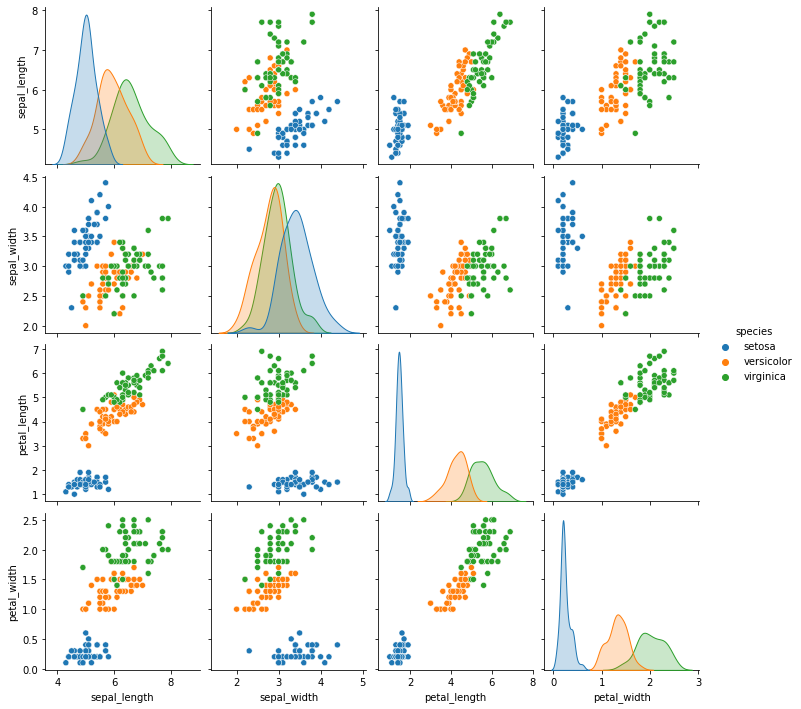

In [ ]:
df = sns.load_dataset("iris")
sns.pairplot(df, hue = "species");

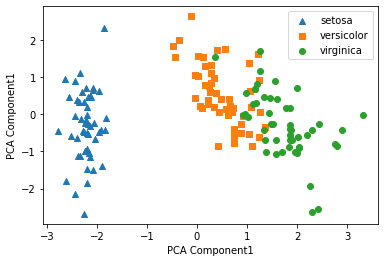

In [ ]:
# PC1, PC2 시각화(품종별로 마커의 색깔과 모양을 달리해서 표현)
markers = ["^", "s", "o"]
for i, marker in enumerate(markers):
  x_data = iris_PCA[iris_PCA["species"] == i]["PC1"]
  y_data = iris_PCA[iris_PCA["species"] == i]["PC2"]
  plt.scatter(x_data, y_data, marker = marker, label = iris.target_names[i])

plt.legend()
plt.xlabel("PCA Component1"), plt.ylabel("PCA Component1")
plt.show()


### 2. Scikit-learn으로 구하기

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)

In [ ]:
iris_pca = pca.fit_transform(iris_std)
iris_pca[:5]

array([[-2.26470281,  0.4800266 ],
       [-2.08096115, -0.67413356],
       [-2.36422905, -0.34190802],
       [-2.29938422, -0.59739451],
       [-2.38984217,  0.64683538]])

In [ ]:
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),PC1,PC2,species
0,5.1,3.5,1.4,0.2,-2.264703,-0.480027,0
1,4.9,3.0,1.4,0.2,-2.080961,0.674134,0
2,4.7,3.2,1.3,0.2,-2.364229,0.341908,0
3,4.6,3.1,1.5,0.2,-2.299384,0.597395,0
4,5.0,3.6,1.4,0.2,-2.389842,-0.646835,0


In [ ]:
pca.explained_variance_ratio_

array([0.72962445, 0.22850762])

In [ ]:
pca.explained_variance_ratio_.sum()

0.9581320720000165

### 3. PCA전후 분류

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split


- 원본 데이터로 분류

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    iris.data, iris.target, stratify = iris.target, random_state = 2022
)


In [ ]:
rfc = RandomForestClassifier(random_state=2022)
rfc.fit(X_train,y_train)
rfc.score(X_test, y_test)

0.9473684210526315

- PCA 데이터로 분류

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    iris_pca, iris.target, stratify = iris.target, random_state = 2022
)


In [ ]:
rfc = RandomForestClassifier(random_state=2022)
rfc.fit(X_train,y_train)
rfc.score(X_test, y_test)

0.8666666666666667